# 10 Minutes to Pandas

[Online Reference](http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)


This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook).

Customarily, we import as follows:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#dsintro).

Creating a [Series](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a [DataFrame](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) by passing a NumPy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.061662,0.402906,0.041577,-0.149403
2013-01-02,0.067361,1.702018,-0.997746,1.883299
2013-01-03,1.663901,-0.669084,-0.305560,-0.275387
2013-01-04,0.701257,0.781000,0.109206,-1.404377
2013-01-05,-0.098407,-0.625911,0.021584,-0.220941
2013-01-06,-0.177092,-0.177135,-0.634795,0.722914


Creating a `DataFrame` by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [7]:
df2.B

0   2013-01-02
1   2013-01-02
2   2013-01-02
3   2013-01-02
Name: B, dtype: datetime64[ns]

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics)

Here is how to view the top and bottom rows of the frame:

In [8]:
df.head()

,A,B,C,D
2013-01-01,0.061662,0.402906,0.041577,-0.149403
2013-01-02,0.067361,1.702018,-0.997746,1.883299
2013-01-03,1.663901,-0.669084,-0.305560,-0.275387
2013-01-04,0.701257,0.781000,0.109206,-1.404377
2013-01-05,-0.098407,-0.625911,0.021584,-0.220941


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,0.701257,0.781000,0.109206,-1.404377
2013-01-05,-0.098407,-0.625911,0.021584,-0.220941
2013-01-06,-0.177092,-0.177135,-0.634795,0.722914


describe() shows a quick statistic summary of your data:

In [10]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.369780,0.235632,-0.294289,0.092684
std,0.705590,0.917261,0.444143,1.107892
min,-0.177092,-0.669084,-0.997746,-1.404377
25%,-0.058390,-0.513717,-0.552486,-0.261776
50%,0.064511,0.112885,-0.141988,-0.185172
75%,0.542783,0.686477,0.036579,0.504835
max,1.663901,1.702018,0.109206,1.883299


Sorting by an axis:

In [93]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2000-01-01,-0.241091,0.665129,1.595645,-1.360661
2000-01-02,-1.118616,2.966207,2.162322,-0.411974
2000-01-03,0.410287,3.381235,0.813739,0.126763
2000-01-04,2.443361,3.586006,0.843930,0.114448
2000-01-05,3.656409,3.327925,0.125503,1.036917
2000-01-06,5.701989,3.165841,0.005732,-0.585819
2000-01-07,5.719519,4.359830,1.898879,0.631806
2000-01-08,5.859911,4.393650,3.238581,1.278333
2000-01-09,5.003809,2.231573,3.395612,-0.271448
2000-01-10,4.766084,2.105061,2.569395,-1.622481


Sorting by values:

In [94]:
df.sort_values(by='B')

,A,B,C,D
2002-05-27,-76.458440,-11.684180,-12.784225,-11.022942
2002-05-26,-76.743896,-11.591835,-14.683758,-9.721215
2000-03-07,-1.207635,-11.540174,10.872994,-2.011694
2002-05-24,-76.069474,-11.406510,-16.164486,-7.377175
2002-05-31,-76.023033,-11.388910,-14.785119,-7.923905
2002-05-28,-78.018539,-11.290079,-13.363716,-9.614823
2002-05-25,-76.826604,-11.209270,-14.862991,-7.915127
2000-03-10,0.181456,-10.983342,14.697666,-1.796254
2002-05-29,-78.956024,-10.770490,-11.902668,-8.958570
2002-05-30,-77.005163,-10.663655,-13.487162,-8.136970


## Selection

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing) and [MultiIndex / Advanced Indexing.](http://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced)

### Getting
Selecting a single column, which yields a Series, equivalent to `df.A`:

In [13]:
df['A']

2013-01-01    0.061662
2013-01-02    0.067361
2013-01-03    1.663901
2013-01-04    0.701257
2013-01-05   -0.098407
2013-01-06   -0.177092
Freq: D, Name: A, dtype: float64

Selecting via `[ ]`, which slices the rows.

In [14]:
df[0:3]

,A,B,C,D
2013-01-01,0.061662,0.402906,0.041577,-0.149403
2013-01-02,0.067361,1.702018,-0.997746,1.883299
2013-01-03,1.663901,-0.669084,-0.305560,-0.275387


In [15]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.067361,1.702018,-0.997746,1.883299
2013-01-03,1.663901,-0.669084,-0.305560,-0.275387
2013-01-04,0.701257,0.781000,0.109206,-1.404377


#### Selection by Label

See more in [Selection by Label](http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label).

For getting a cross section using a label:

In [16]:
df.loc[dates[0]]

A    0.061662
B    0.402906
C    0.041577
D   -0.149403
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [17]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.061662,0.402906
2013-01-02,0.067361,1.702018
2013-01-03,1.663901,-0.669084
2013-01-04,0.701257,0.781000
2013-01-05,-0.098407,-0.625911
2013-01-06,-0.177092,-0.177135


Showing label slicing, both endpoints are included:

In [18]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,0.067361,1.702018
2013-01-03,1.663901,-0.669084
2013-01-04,0.701257,0.781000


Reduction in the dimensions of the returned object:

In [19]:
df.loc['20130102', ['A', 'B']]

A    0.067361
B    1.702018
Name: 2013-01-02 00:00:00, dtype: float64

#### Boolean Indexing 

Using a single column’s values to select data.

In [20]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.061662,0.402906,0.041577,-0.149403
2013-01-02,0.067361,1.702018,-0.997746,1.883299
2013-01-03,1.663901,-0.669084,-0.305560,-0.275387
2013-01-04,0.701257,0.781000,0.109206,-1.404377


Selecting values from a DataFrame where a boolean condition is met.

In [21]:
df[df > 0]

,A,B,C,D
2013-01-01,0.061662,0.402906,0.041577,NaN
2013-01-02,0.067361,1.702018,NaN,1.883299
2013-01-03,1.663901,NaN,NaN,NaN
2013-01-04,0.701257,0.781000,0.109206,NaN
2013-01-05,NaN,NaN,0.021584,NaN
2013-01-06,NaN,NaN,NaN,0.722914


## Setting

Setting a new column automatically aligns the data by the indexes.

In [22]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [23]:
df['F'] = s1

Setting values by label:

In [24]:
df.at[dates[0], 'A'] = 0

Setting by assigning with a NumPy array:

In [25]:
df.loc[:, 'D'] = np.array([5] * len(df))

The result of the prior setting operations.

In [26]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.402906,0.041577,5,NaN
2013-01-02,0.067361,1.702018,-0.997746,5,1.0
2013-01-03,1.663901,-0.669084,-0.305560,5,2.0
2013-01-04,0.701257,0.781000,0.109206,5,3.0
2013-01-05,-0.098407,-0.625911,0.021584,5,4.0
2013-01-06,-0.177092,-0.177135,-0.634795,5,5.0


A where operation with setting.

In [27]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,-0.402906,-0.041577,-5,NaN
2013-01-02,-0.067361,-1.702018,-0.997746,-5,-1.0
2013-01-03,-1.663901,-0.669084,-0.305560,-5,-2.0
2013-01-04,-0.701257,-0.781000,-0.109206,-5,-3.0
2013-01-05,-0.098407,-0.625911,-0.021584,-5,-4.0
2013-01-06,-0.177092,-0.177135,-0.634795,-5,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the [Missing Data section](http://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data).

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [28]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.402906,0.041577,5,NaN,NaN
2013-01-02,0.067361,1.702018,-0.997746,5,1.0,NaN
2013-01-03,1.663901,-0.669084,-0.305560,5,2.0,NaN
2013-01-04,0.701257,0.781000,0.109206,5,3.0,NaN


To drop any rows that have missing data.

In [29]:
df1.dropna(how='any')

,A,B,C,D,F,E


Filling missing data.

In [30]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.402906,0.041577,5,5.0,5.0
2013-01-02,0.067361,1.702018,-0.997746,5,1.0,5.0
2013-01-03,1.663901,-0.669084,-0.305560,5,2.0,5.0
2013-01-04,0.701257,0.781000,0.109206,5,3.0,5.0


To get the boolean mask where values are nan.

In [31]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,True
2013-01-02,False,False,False,False,False,True
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [32]:
df.mean()

A    0.359503
B    0.235632
C   -0.294289
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [33]:
df.mean(1)

2013-01-01    1.361121
2013-01-02    1.354327
2013-01-03    1.537851
2013-01-04    1.918293
2013-01-05    1.659453
2013-01-06    1.802196
Freq: D, dtype: float64

### Apply

Applying functions to the data

In [34]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.402906,0.041577,5,NaN
2013-01-02,0.067361,2.104924,-0.956169,10,1.0
2013-01-03,1.731261,1.435840,-1.261729,15,3.0
2013-01-04,2.432518,2.216841,-1.152523,20,6.0
2013-01-05,2.334111,1.590930,-1.130939,25,10.0
2013-01-06,2.157020,1.413794,-1.765734,30,15.0


In [35]:
df.apply(lambda x: x.max() - x.min())

A    1.840992
B    2.371102
C    1.106952
D    0.000000
F    4.000000
dtype: float64

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [36]:
df = pd.DataFrame(np.random.randn(10, 4))

In [37]:
df

,0,1,2,3
0,-1.506889,-0.389250,0.222058,-0.297164
1,0.237272,-0.650218,-1.014228,-0.937177
2,-1.238939,-0.855975,-0.566402,0.348254
3,-1.205365,-1.108307,-0.874262,1.112008
4,1.725574,-1.646418,-1.490491,-1.878718
5,-0.000164,-0.893295,1.643627,1.018395
6,-0.466747,-2.480091,-0.814688,-1.694475
7,1.568838,-0.464393,0.111391,1.094862
8,-1.933851,0.155630,1.488888,-0.063272
9,-0.624890,-1.354606,-0.210596,-0.929618


In [38]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [39]:
pd.concat(pieces)

,0,1,2,3
0,-1.506889,-0.389250,0.222058,-0.297164
1,0.237272,-0.650218,-1.014228,-0.937177
2,-1.238939,-0.855975,-0.566402,0.348254
3,-1.205365,-1.108307,-0.874262,1.112008
4,1.725574,-1.646418,-1.490491,-1.878718
5,-0.000164,-0.893295,1.643627,1.018395
6,-0.466747,-2.480091,-0.814688,-1.694475
7,1.568838,-0.464393,0.111391,1.094862
8,-1.933851,0.155630,1.488888,-0.063272
9,-0.624890,-1.354606,-0.210596,-0.929618


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [40]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [41]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [42]:
left

,key,lval
0,foo,1
1,foo,2


In [43]:
right

,key,rval
0,foo,4
1,foo,5


In [44]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [45]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [46]:
df

,A,B,C,D
0,-0.076769,-0.249463,1.161215,-0.236684
1,-0.004805,-1.051932,-0.500040,1.019265
2,-0.331789,-0.777578,1.086267,-0.060391
3,1.127015,-0.044749,-0.105903,-0.569444
4,0.173194,1.223196,1.267438,-0.574127
5,-0.552029,1.096748,0.971124,-0.057003
6,-1.657154,-0.789063,0.915515,0.472821
7,-0.576739,-0.385483,0.047372,2.348774


In [47]:
s = df.loc[3]

In [48]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.076769,-0.249463,1.161215,-0.236684
1,-0.004805,-1.051932,-0.500040,1.019265
2,-0.331789,-0.777578,1.086267,-0.060391
3,1.127015,-0.044749,-0.105903,-0.569444
4,0.173194,1.223196,1.267438,-0.574127
5,-0.552029,1.096748,0.971124,-0.057003
6,-1.657154,-0.789063,0.915515,0.472821
7,-0.576739,-0.385483,0.047372,2.348774
8,1.127015,-0.044749,-0.105903,-0.569444


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [49]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [50]:
df

,A,B,C,D
0,foo,one,1.000146,0.647414
1,bar,one,0.879539,-0.416666
2,foo,two,1.228494,-0.291743
3,bar,three,-1.464386,-0.302504
4,foo,two,-0.669049,0.549968
5,bar,two,-0.491257,0.616898
6,foo,one,-1.010292,0.722669
7,foo,three,-0.127538,-0.729703


Grouping and then applying a function sum to the resulting groups.

In [51]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.076104,-0.102273
foo,0.421761,0.898606


In [52]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.879539 -0.416666
    three -1.464386 -0.302504
    two   -0.491257  0.616898
foo one   -0.010146  1.370083
    three -0.127538 -0.729703
    two    0.559445  0.258225

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [53]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [54]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [55]:
ts.resample('5Min').sum()

2012-01-01    24155
Freq: 5T, dtype: int64

Time zone representation

In [56]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [57]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [58]:
ts

2012-03-06   -1.146233
2012-03-07    0.928577
2012-03-08   -0.410621
2012-03-09    0.276092
2012-03-10    0.221587
Freq: D, dtype: float64

In [59]:
ts_utc = ts.tz_localize('UTC')

In [60]:
ts_utc

2012-03-06 00:00:00+00:00   -1.146233
2012-03-07 00:00:00+00:00    0.928577
2012-03-08 00:00:00+00:00   -0.410621
2012-03-09 00:00:00+00:00    0.276092
2012-03-10 00:00:00+00:00    0.221587
Freq: D, dtype: float64


Convert to another time zone

In [61]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.146233
2012-03-06 19:00:00-05:00    0.928577
2012-03-07 19:00:00-05:00   -0.410621
2012-03-08 19:00:00-05:00    0.276092
2012-03-09 19:00:00-05:00    0.221587
Freq: D, dtype: float64


Converting between time span representations

In [62]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [63]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [64]:
ts

2012-01-31   -0.015338
2012-02-29   -0.762535
2012-03-31   -0.160243
2012-04-30   -1.159939
2012-05-31   -0.348818
Freq: M, dtype: float64

In [65]:
ps = ts.to_period()

In [66]:
ps

2012-01   -0.015338
2012-02   -0.762535
2012-03   -0.160243
2012-04   -1.159939
2012-05   -0.348818
Freq: M, dtype: float64

In [67]:
ps.to_timestamp()

2012-01-01   -0.015338
2012-02-01   -0.762535
2012-03-01   -0.160243
2012-04-01   -1.159939
2012-05-01   -0.348818
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [68]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [69]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [70]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [71]:
ts.head()

1990-03-01 09:00    0.191822
1990-06-01 09:00   -0.787536
1990-09-01 09:00   -0.717738
1990-12-01 09:00    0.387199
1991-03-01 09:00    0.485183
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [72]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [73]:
df["grade"] = df["raw_grade"].astype("category")

In [74]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [75]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [76]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [77]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [78]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [79]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [80]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [81]:
ts = ts.cumsum()

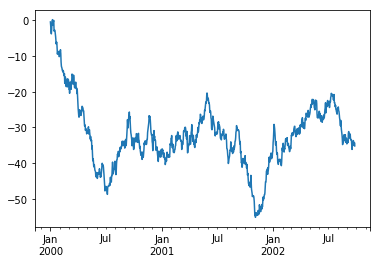

In [82]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [83]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [84]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

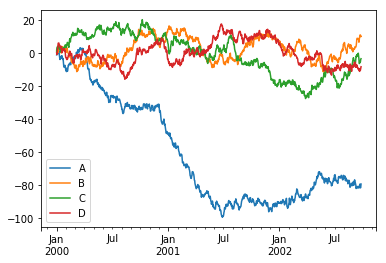

In [85]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [86]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [87]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.360661,1.595645,0.665129,-0.241091
1,2000-01-02,-0.411974,2.162322,2.966207,-1.118616
2,2000-01-03,0.126763,0.813739,3.381235,0.410287
3,2000-01-04,0.114448,0.843930,3.586006,2.443361
4,2000-01-05,1.036917,0.125503,3.327925,3.656409
5,2000-01-06,-0.585819,0.005732,3.165841,5.701989
6,2000-01-07,0.631806,1.898879,4.359830,5.719519
7,2000-01-08,1.278333,3.238581,4.393650,5.859911
8,2000-01-09,-0.271448,3.395612,2.231573,5.003809
9,2000-01-10,-1.622481,2.569395,2.105061,4.766084


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [88]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [89]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-1.360661,1.595645,0.665129,-0.241091
2000-01-02,-0.411974,2.162322,2.966207,-1.118616
2000-01-03,0.126763,0.813739,3.381235,0.410287
2000-01-04,0.114448,0.843930,3.586006,2.443361
2000-01-05,1.036917,0.125503,3.327925,3.656409
2000-01-06,-0.585819,0.005732,3.165841,5.701989
2000-01-07,0.631806,1.898879,4.359830,5.719519
2000-01-08,1.278333,3.238581,4.393650,5.859911
2000-01-09,-0.271448,3.395612,2.231573,5.003809
2000-01-10,-1.622481,2.569395,2.105061,4.766084


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [90]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [91]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,-1.360661,1.595645,0.665129,-0.241091
2000-01-02,-0.411974,2.162322,2.966207,-1.118616
2000-01-03,0.126763,0.813739,3.381235,0.410287
2000-01-04,0.114448,0.843930,3.586006,2.443361
2000-01-05,1.036917,0.125503,3.327925,3.656409
2000-01-06,-0.585819,0.005732,3.165841,5.701989
2000-01-07,0.631806,1.898879,4.359830,5.719519
2000-01-08,1.278333,3.238581,4.393650,5.859911
2000-01-09,-0.271448,3.395612,2.231573,5.003809
2000-01-10,-1.622481,2.569395,2.105061,4.766084
